# Pymaceuticals Inc.
---

### Analysis

-There are 10 regimen treatments and Capomulin regimen has the most mice tested followed by Ramicane.

-Infubinol has an outlier that outside of the lower bound in the box plot chart. 

-Mouse ID s185 shows a positive result with Capomulin treatment where the tumor volume size is shrinking day by day. 

-There are a positive correlation between mouse weight and average tumor volume with correlation of 0.84. The heavier the mice are the bigger the size of tumor.  
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID" )
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_of_mice = merge_df["Mouse ID"].nunique()
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = merge_df[merge_df.duplicated(['Mouse ID',"Timepoint" ])]
dup_id["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup = pd.DataFrame(merge_df.loc[merge_df['Mouse ID'] == "g989",:])
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(range(908,921))
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = clean_df["Mouse ID"].nunique()
num_of_mice

248

In [7]:
# group by drug regimen for the summary stat table & charts
grouped_regimen = clean_df.groupby(["Drug Regimen"])
grouped_regimen.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = grouped_regimen["Tumor Volume (mm3)"].mean()
median = grouped_regimen["Tumor Volume (mm3)"].median()
variance = grouped_regimen["Tumor Volume (mm3)"].var()
std = grouped_regimen["Tumor Volume (mm3)"].std()
sem = grouped_regimen["Tumor Volume (mm3)"].sem()

summary_stat_tumor = pd.DataFrame({"Mean Tumor Volume": mean,
                                "Median Tumor Volume": median,
                               "Tumor Volume Variance": variance,
                                "Tumor Volume Std. Dev.": std ,
                                "Tumor Volume Std. Err.": sem,
})

summary_stat_tumor


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
grouped_regimen.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}) 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

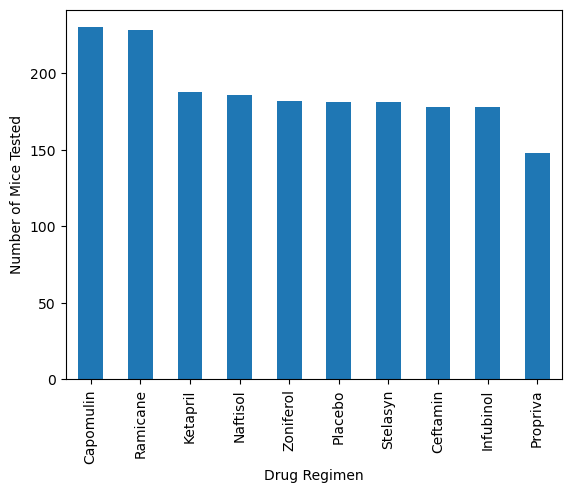

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_regimen = grouped_regimen["Timepoint"].count()
timepoints_regimen = timepoints_regimen.sort_values(ascending=False)
timepoints_regimen.plot.bar(ylabel="Number of Mice Tested")
plt.show()

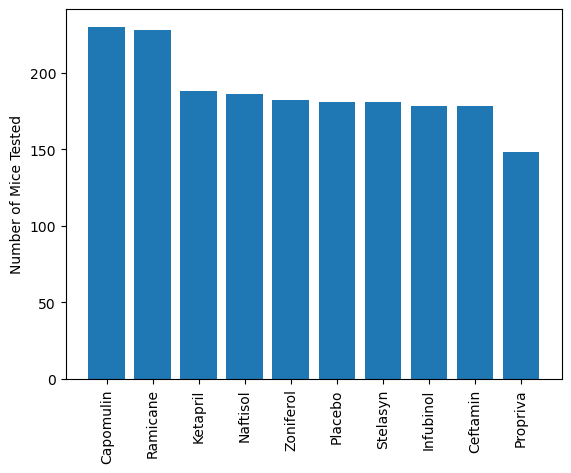

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_data = clean_df["Drug Regimen"].value_counts()
plt.bar(bar_data.index.values, bar_data.values)
plt.xticks(rotation = 90)
plt.ylabel("Number of Mice Tested")
plt.show()

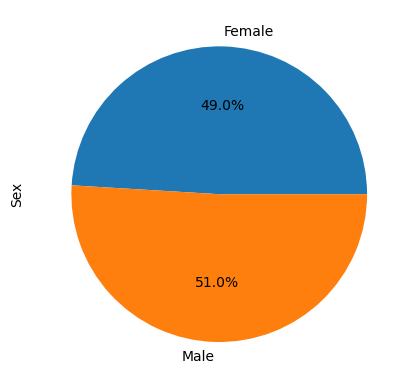

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(["Sex"])
size = sex["Mouse ID"].count()
size.plot.pie(autopct="%1.1f%%", ylabel = "Sex")
plt.show()

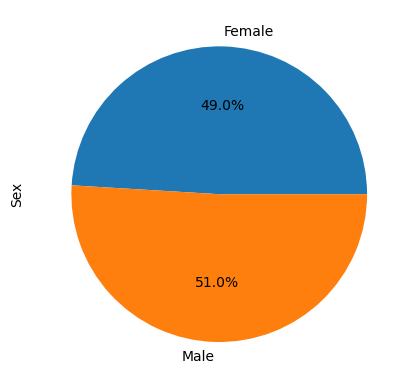

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_df.groupby(["Sex"])
size = sex["Mouse ID"].count()
plt.pie(size,labels=size.index.values,autopct="%1.1f%%")
plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last = clean_df.groupby("Mouse ID").max()["Timepoint"]
merge_last = pd.merge(last, clean_df, on=("Mouse ID", "Timepoint"))

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []
for x in treatments: 
    regimen = merge_last.loc[merge_last["Drug Regimen"] == x,"Tumor Volume (mm3)"] 
    tumor_vol.append(regimen)
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5  
    print(f"The lower quartile of {x} tumors is: {lowerq}")
    print(f"The upper quartile of {x} tumors is: {upperq}")
    print(f"The interquartile range of {x} tumors is: {iqr}")
    print(f"The median of {x} tumors is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} of {x} could be outliers.")
    print(f"Values above {upper_bound} of {x} could be outliers.")





The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The median of Capomulin tumors is: 38.1251644 
Values below 20.70456164999999 of Capomulin could be outliers.
Values above 51.83201549 of Capomulin could be outliers.
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 of Ramicane could be outliers.
Values above 54.30681135 of Ramicane could be outliers.
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 of Infubinol could be outliers.
Values above 82.74144559000001 

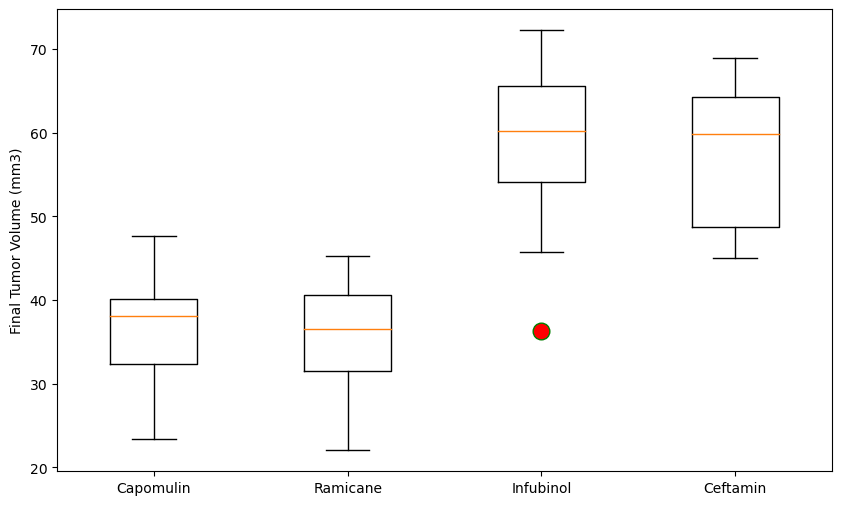

In [16]:
plot = tumor_vol
fig, ax1 = plt.subplots(figsize= (10,6))
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
ax1.boxplot(plot, labels=treatments, flierprops=flierprops)

ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

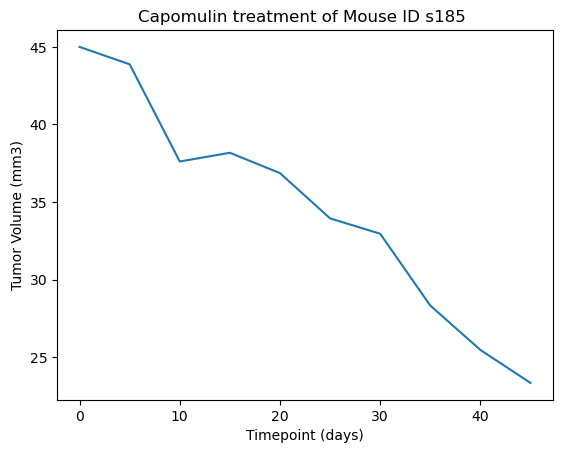

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "s185")] 


plt.plot(Capomulin["Timepoint"],Capomulin["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of Mouse ID s185 ")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

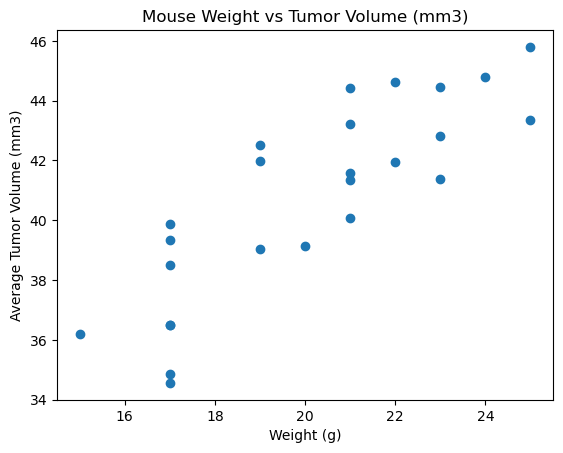

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
avg = Capomulin.groupby(["Mouse ID"]).mean()

avg_vol = avg["Tumor Volume (mm3)"]
avg_weight = avg["Weight (g)"]

plt.scatter(avg_weight, avg_vol)
plt.title("Mouse Weight vs Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84.


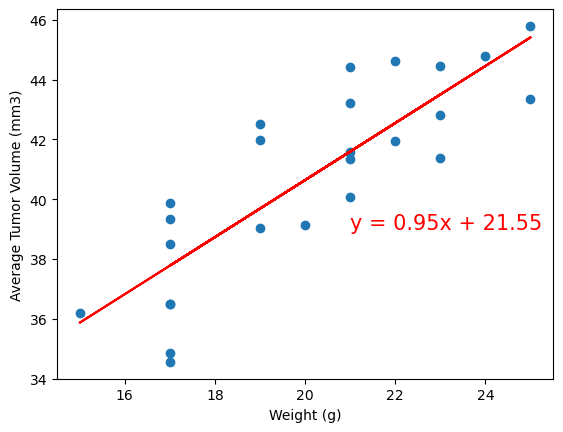

In [19]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(avg_weight,avg_vol)
print(f"The correlation between mouse weight and the average tumor volume {round(correlation[0],2)}.")
# for mouse weight and average tumor volume for the Capomulin regimen
avg_vol = avg["Tumor Volume (mm3)"]
avg_weight = avg["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_vol)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_weight,avg_vol)
plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(21,39),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

